In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [2]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris["data"][:, (2,3)]
y = (iris["target"] ==2).astype(np.float64)

In [3]:
from sklearn.pipeline import Pipeline
svm_clf = Pipeline([('std_scaler',StandardScaler()),('linear_svc',LinearSVC(C = 1, loss='hinge'))])
svm_clf.fit(X,y)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [4]:
svm_clf.predict([[5.5, 7]])

array([1.])

In [5]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures

X, y = datasets.make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = Pipeline([("poly_features", PolynomialFeatures(degree=3)), ("scaler",StandardScaler()),("svm_clf",LinearSVC(C=10,loss = 'hinge'))])
polynomial_svm_clf.fit(X, y)

/home/pedro/miniconda3/envs/tf2/lib/python3.8/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

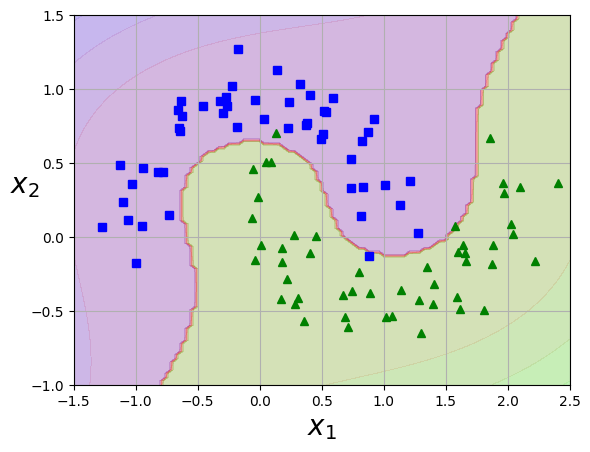

In [6]:
import matplotlib.pyplot as plt

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)


def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])



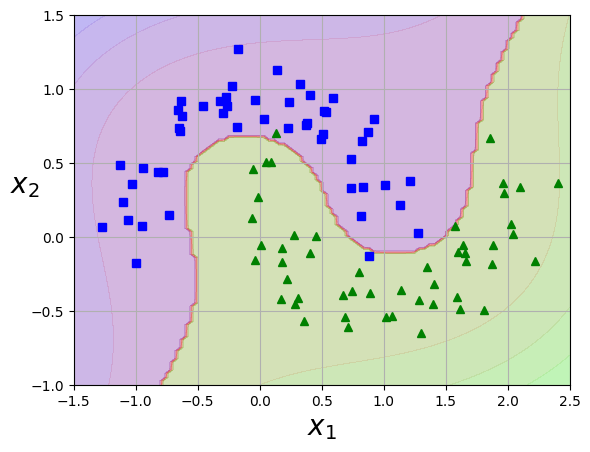

In [7]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([("std_scaler", StandardScaler()),("svm_clf", SVC(kernel="poly",degree=3, coef0=1, C=5))])
poly_kernel_svm_clf.fit(X, y)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

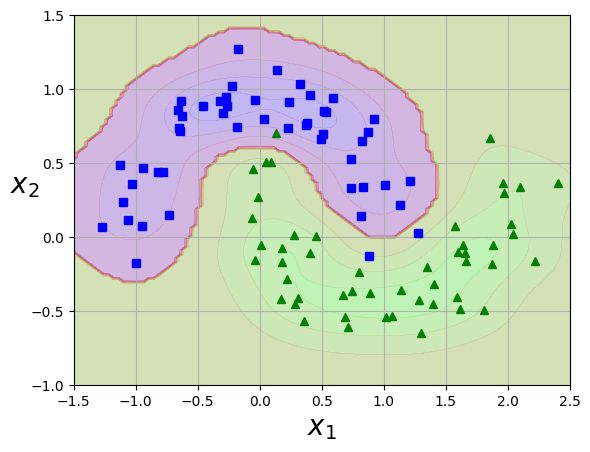

In [8]:
from sklearn.svm import SVC

rbf_kernel_svm_clf = Pipeline([("std_scaler", StandardScaler()),("svm_clf", SVC(kernel="rbf",gamma=5, C=0.001))])
rbf_kernel_svm_clf.fit(X, y)
plot_predictions(rbf_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

In [9]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5)

In [10]:
from sklearn.svm import SVR


svm_poly_reg = SVR(kernel="poly", degree=2, C = 100, epsilon= 0.1)
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')